## Dataset : Tips Dataset

Dataset Description: Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. 

Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay. 

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law, the restaurant offered to seat in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From This information we frame the problem :
1. Problem Statements : How might we predict tips that will be recieved by food servers so we can minimize unfair treatment ?
1. Data :
  1. Label : Tips
  1. Features : Total Bill
1. ML Objective : Minimize the appearance of unfair treatment of the food servers, for whom tips are major component of pay.
1. Action : Make food servers allocation 
1. Value : the sake of staff morale

## Python Exercise : Simple Linear Regression

Table of contents :

Analyze tips data from seaborn
- Total Bill as independent variable
- Tips as dependent variable

Analyze the relationship
Apply simple linear regression
Perform Ftest and Ttest
Interpret the result
use α 5%

## Library

In [16]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

## Read tips dataset

In [17]:
tips = sns.load_dataset('tips')

## EDA (Exploratory Data Analysis)

to understand our data :
1. Descriptive Statistics
1. Correlation
1. Graphical summary

In [18]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [19]:
tips[['tip','total_bill']].describe()

,tip,total_bill
count,244.000000,244.000000
mean,2.998279,19.785943
std,1.383638,8.902412
min,1.000000,3.070000
25%,2.000000,13.347500
50%,2.900000,17.795000
75%,3.562500,24.127500
max,10.000000,50.810000


In [20]:
tips[['tip', 'total_bill']].corr()

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

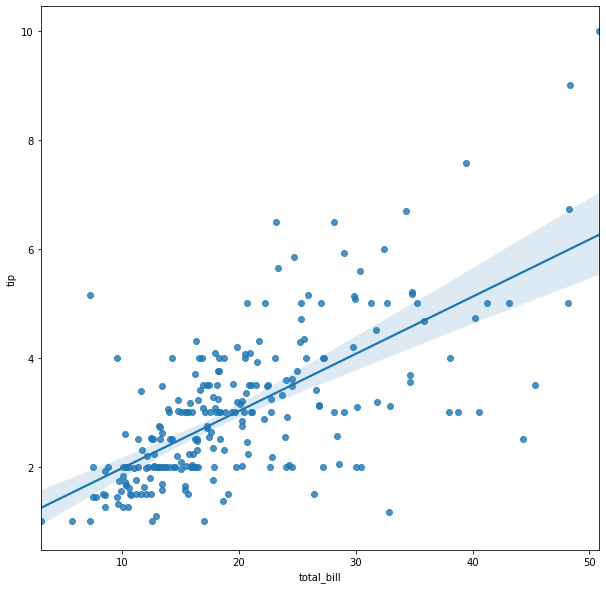

In [21]:
plt.figure(figsize = (10,10))
sns.regplot(x = 'total_bill', y = 'tip', data = tips)

## Simple Linear Regression

We start to apply simple linear regression to the dataset:

Y : tips

x : total_bill

In [23]:
sm_lm = sm.OLS(tips['tip'], sm.add_constant(tips['total_bill']))
result = sm_lm.fit()

In [24]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Sun, 19 Sep 2021   Prob (F-statistic):           6.69e-34
Time:                        18:35:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

## Interpretation

F-Test:
<br>
B1 : P-Value of the Simultant test (Prob (F-statistics)) is below 0.05. We have enough evidence that totall bill affect tip that given to the food servers.
<br>
Partial Test:
1. B0 : P-Value of the partial test is below 0.05. B0 is the condition when total bill has value of zero. in this case, it doesn't make sense that if there is people who paid food freely. So, the interpretation is the model still need B0. 
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that higher total bill increase tip that given to the food servers

Parameter Estimate:
1. B0 = 0.9203 : This is not need to be interpreted because there is no people that paid free (x = 0) and 0 also fall outside 3.07 Dollar - 50.81 Dollar interval
1. B1 = 0.1050 : When the total bill increase 1 Dollar, the tip will increase about 0.1050 Dollar or When the total bill increase 10 Dollar, the tip will increase about 1.05 Dollar (*This interpretation only recommended when total bill fall between 3.07 Dollar and 50.81 Dollar) 
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
R-Square = 45.7% : This model can explain 45.7% variation of tips.